## Microsoft Azure - Cognitive Services - Face

* Face detection
* Emotion recognition
* Face identification
* Similar face search
* Face grouping

https://azure.microsoft.com/en-us/services/cognitive-services/face/?v=18.05

https://github.com/Microsoft/Cognitive-Face-Python

https://github.com/Microsoft/Cognitive-Face-Python/blob/master/cognitive_face/face.py


### Exercício

* Explore a API da Microsoft Azure 
* Execute os passos apresentados no notebook com fotos do GRUPO

### Environment setup

Para executar este notebook, realize o download das bibliotecas em anexo e execute a instalação dos pacotes via `apt` e `pip`

In [4]:
from google.colab import files
uploaded = files.upload() # then browse, select the files. It's then uploaded

Saving img_3.jpg to img_3.jpg


In [3]:
# Download do Dataset, libs e dependencias
!wget https://storage.googleapis.com/ms_geral/3_azure.zip
!unzip 3_azure.zip

--2018-08-04 19:31:02--  https://storage.googleapis.com/ms_geral/3_azure.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1352794 (1.3M) [application/zip]
Saving to: ‘3_azure.zip’

3_azure.zip         100%[===================>]   1.29M  --.-KB/s    in 0.01s   

2018-08-04 19:31:02 (90.0 MB/s) - ‘3_azure.zip’ saved [1352794/1352794]

Archive:  3_azure.zip
  inflating: azure.ipynb             
   creating: images/
   creating: images/images_cluster/
  inflating: images/images_cluster/Arnold_Schwarzenegger_0001.jpg  
  inflating: images/images_cluster/Arnold_Schwarzenegger_0002.jpg  
  inflating: images/images_cluster/Arnold_Schwarzenegger_0003.jpg  
  inflating: images/images_cluster/Arnold_Schwarzenegger_0004.jpg  
  inflating: images/images_cluster/Arnold_Schwarzenegger_0008.jpg  
  

In [5]:
# Instalação das dependencias
!pip install cognitive_face

#### Chave de Acesso ao Azure

In [0]:
import cognitive_face as CF

In [0]:
# A Key e a BaseURL devem ser criadas dentro da conta do Cognitiva da Azure

KEY      = 'c088342aa1ed412da23b76c78fca0274'  # Replace with a valid Subscription Key here.
BASE_URL = 'https://southcentralus.api.cognitive.microsoft.com/face/v1.0'  # Replace with your regional Base URL

CF.Key.set(KEY)
CF.BaseUrl.set(BASE_URL)

In [0]:
import json
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['axes.grid'] = 'off'

from util import *

In [0]:
#from google.colab import files
#uploaded = files.upload() # then browse, select the files. It's then uploaded

### Imagens


In [10]:
!ls

3_azure.zip  azure.ipynb  images  img_3.jpg  __pycache__  util.py


### Detecção da Face
`CF.face.detect(image, face_id=True, landmarks=False, attributes='')`

In [0]:
# def detect(image, face_id=True, landmarks=False, attributes=''):
#     Detect human faces in an image and returns face locations, and
#     optionally with `face_id`s, landmarks, and attributes.
#     Args:
#         image: A URL or a file path or a file-like object represents an image.
#         face_id: [Optional] Return faceIds of the detected faces or not. The
#             default value is true.
#         landmarks: [Optional] Return face landmarks of the detected faces or
#             not. The default value is false.
#         attributes: [Optional] Analyze and return the one or more specified
#             face attributes in the comma-separated string like
#             "age,gender". Supported face attributes include age, gender,
#             headPose, smile, facialHair, glasses, emotion, makeup, accessories,
#             occlusion, blur, exposure, noise. Note that each face attribute
#             analysis has additional computational and time cost.
#     Returns:
#         An array of face entries ranked by face rectangle size in descending
#         order. An empty response indicates no faces detected. A face entry may
#         contain the corresponding values depending on input parameters.

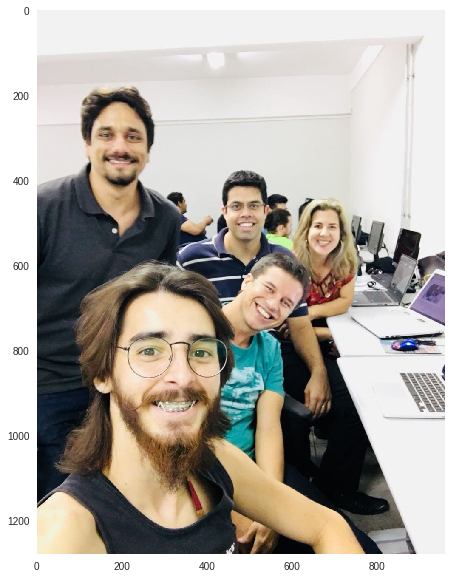

In [13]:
# Leitura da imagem original
img_url = 'img_3.jpg'
img_all = load_image(img_url)

f = plt.figure(figsize=(10 , 10))
plt.imshow(img_all)

In [0]:
result = CF.face.detect(img_url, attributes='age,gender,emotion,smile,glasses')

In [58]:
print_json(result)

[
  {
    "faceId": "66b103f4-c3bd-4712-97eb-3e08d76bf5ab",
    "faceRectangle": {
      "top": 730,
      "left": 194,
      "width": 264,
      "height": 264
    },
    "faceAttributes": {
      "smile": 1.0,
      "gender": "male",
      "age": 32.0,
      "glasses": "ReadingGlasses",
      "emotion": {
        "anger": 0.0,
        "contempt": 0.0,
        "disgust": 0.0,
        "fear": 0.0,
        "happiness": 1.0,
        "neutral": 0.0,
        "sadness": 0.0,
        "surprise": 0.0
      }
    }
  },
  {
    "faceId": "140ea7f0-6a3b-47cd-9203-5ac40b4aa599",
    "faceRectangle": {
      "top": 259,
      "left": 124,
      "width": 134,
      "height": 134
    },
    "faceAttributes": {
      "smile": 1.0,
      "gender": "male",
      "age": 39.0,
      "glasses": "NoGlasses",
      "emotion": {
        "anger": 0.0,
        "contempt": 0.0,
        "disgust": 0.0,
        "fear": 0.0,
        "happiness": 1.0,
        "neutral": 0.0,
        "sadness": 0.0,
        "surpris

In [0]:
faces          = []
identities     = []
frame          = img_all.copy()

# Interator faces in image
for i, d in enumerate(result):
    face = cropped_face(img_all, d['faceRectangle'])
    faces.append(face)
    identities.append(d['faceAttributes'])
    # 
    identity = d['faceAttributes']['gender']
    # Draw Rectangle
    frame = draw_rectangle_face(frame, d['faceRectangle'], str(identity))

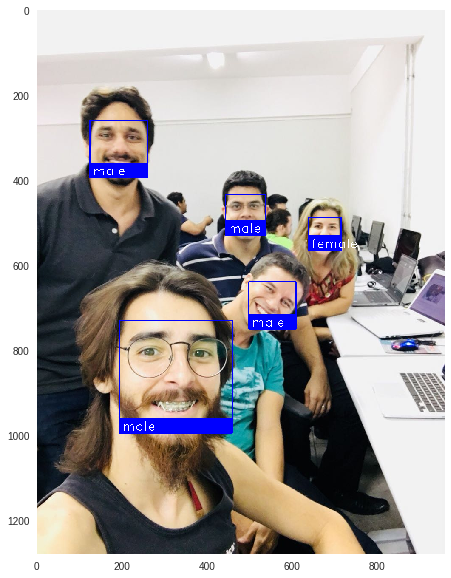

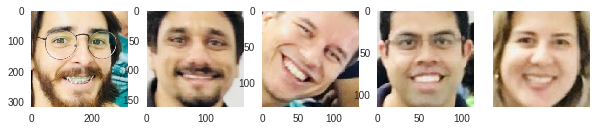

In [64]:
f = plt.figure(figsize=(10 , 10))
plt.imshow(frame)
plt_img(faces[:5])

In [18]:
identities[:5]

[{'age': 32.0, 'gender': 'male'},
 {'age': 39.0, 'gender': 'male'},
 {'age': 32.0, 'gender': 'male'},
 {'age': 32.0, 'gender': 'male'},
 {'age': 28.0, 'gender': 'female'}]

### Clusterização de imagens semelhantes 

In [33]:
metadata = load_metadata('images/images_cluster')
metadata.shape

(13,)

In [34]:
azure_r  = []
face_ids = {}
for i in metadata:
    print(i.image_path())
    face = CF.face.detect(i.image_path(), attributes='age,gender')
    if len(face) > 0:
        azure_r.append(face)
        face_ids[face[0]['faceId']] = i 

images/images_cluster/Vladimir_Putin_0003.jpg
images/images_cluster/Vladimir_Putin_0009.jpg
images/images_cluster/Arnold_Schwarzenegger_0002.jpg
images/images_cluster/Arnold_Schwarzenegger_0008.jpg
images/images_cluster/Vladimir_Putin_0002.jpg
images/images_cluster/Arnold_Schwarzenegger_0010.jpg
images/images_cluster/Vladimir_Putin_0010.jpg
images/images_cluster/Arnold_Schwarzenegger_0003.jpg
images/images_cluster/Arnold_Schwarzenegger_0001.jpg
images/images_cluster/Vladimir_Putin_0005.jpg
images/images_cluster/Arnold_Schwarzenegger_0004.jpg
images/images_cluster/Arnold_Schwarzenegger_0009.jpg
images/images_cluster/Vladimir_Putin_0004.jpg


#### CF.face.group()

`CF.face.group(face_ids)`

In [0]:
# def group(face_ids):
#     """Divide candidate faces into groups based on face similarity.
#     Args:
#         face_ids: An array of candidate `face_id`s created by `face.detect`.
#             The maximum is 1000 faces.
#     Returns:
#         one or more groups of similar faces (ranked by group size) and a
#         messyGroup.
#     """

In [0]:
res_group = CF.face.group(list(face_ids.keys()))

In [36]:
res_group

{'groups': [['319090a2-4e74-4793-9c95-8d71a1e92467',
   '8d45bcf3-0ebd-4cc9-900c-dc36f0d0b0d8',
   '3517c7df-6835-4d3f-8bc0-a25ed28cd5ca',
   'c9fb7996-6a78-42cf-ab19-c770912ab1f1',
   '77243520-e250-4ca9-8b40-fc17d04c780d',
   'a0e7b47d-01d5-4c91-96f9-b4ce58d31306'],
  ['97195d9b-d554-45b3-a028-8c1c102fc452',
   'af0954b3-8214-4d4d-afde-e5a83d2866a5',
   'd420067f-7222-4c5f-8981-3c4aa2618154',
   '6a3a4e58-1792-4055-8c76-aea366b2d4b6',
   'aeb2e9ae-f18b-4487-9dd9-9cdc08c1dbeb',
   'b42b5910-c359-4dc9-80b9-0be8df12180b']],
 'messyGroup': ['fc14f64e-8374-41e7-b8f5-d07d6e332a7d']}

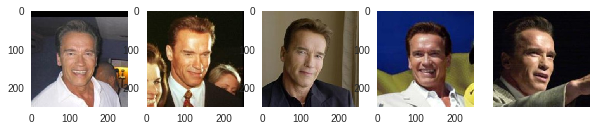

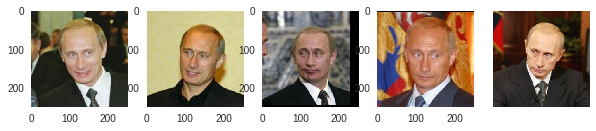

In [37]:
for g in res_group['groups']:
    metadata = [face_ids[i] for i in g]
    plt_img([load_image(m.image_path()) for m in metadata[:5]])

#### Imagens sem grupo definido

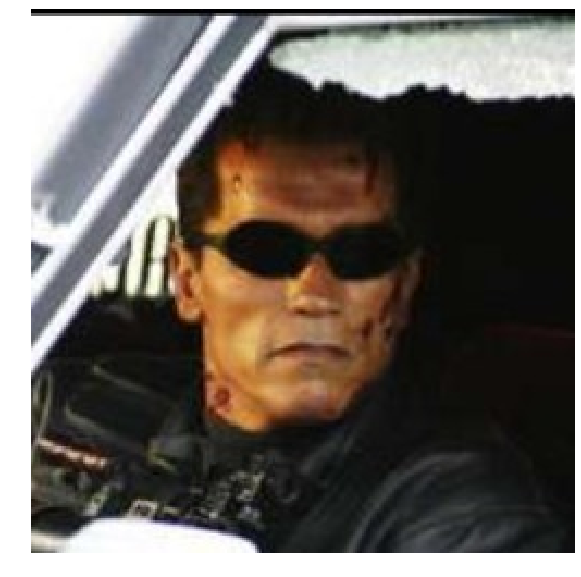

In [38]:
metadata = [face_ids[i] for i in res_group['messyGroup']]
plt_img([load_image(m.image_path()) for m in metadata[:5]])